In [196]:
!date

Thu Nov 19 11:33:30 PST 2020


# Sex specific assignments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import anndata

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
cols = ["transcript_id", "gene_id", "gene_name", "transcript_name", "chromosome", "start", "stop", "strand"]
chry = pd.read_csv("/home/sina/projects/mop/BYVSTZP_2020/reference/chr_y.txt", sep=" ", header=None, names=cols)
chry.index = chry.transcript_name + "_" + chry.transcript_id.apply(lambda x: x.split(".")[0])

In [4]:
chry

,transcript_id,gene_id,gene_name,transcript_name,chromosome,start,stop,strand
Kdm5d-201_ENSMUST00000055032,ENSMUST00000055032.13,ENSMUSG00000056673.14,Kdm5d,Kdm5d-201,chr:Y,start:897790,end:946316,strand:+
Zfy1-201_ENSMUST00000065545,ENSMUST00000065545.5,ENSMUSG00000053211.10,Zfy1,Zfy1-201,chr:Y,start:725209,end:797409,strand:-
Uty-201_ENSMUST00000069309,ENSMUST00000069309.13,ENSMUSG00000068457.14,Uty,Uty-201,chr:Y,start:1097144,end:1245718,strand:-
Sry-201_ENSMUST00000091178,ENSMUST00000091178.1,ENSMUSG00000069036.3,Sry,Sry-201,chr:Y,start:2662471,end:2663658,strand:-
Usp9y-201_ENSMUST00000091188,ENSMUST00000091188.6,ENSMUSG00000069044.6,Usp9y,Usp9y-201,chr:Y,start:1298961,end:1459782,strand:-
...,...,...,...,...,...,...,...,...
Gm37071-203_ENSMUST00000195814,ENSMUST00000195814.5,ENSMUSG00000103977.5,Gm37071,Gm37071-203,chr:Y,start:25077341,end:25080578,strand:-
Gm37263-201_ENSMUST00000195837,ENSMUST00000195837.1,ENSMUSG00000103524.1,Gm37263,Gm37263-201,chr:Y,start:13917048,end:13920389,strand:-
Gm32181-203_ENSMUST00000195871,ENSMUST00000195871.1,ENSMUSG00000103462.5,Gm32181,Gm32181-203,chr:Y,start:26326349,end:26328708,strand:-
Gm37130-202_ENSMUST00000195874,ENSMUST00000195874.5,ENSMUSG00000103681.5,Gm37130,Gm37130-202,chr:Y,start:13952701,end:13955065,strand:+


In [154]:
isoform = anndata.read_h5ad("../../data/notebook/revision/isoform.h5ad")

In [172]:
a = nd(isoform.layers["norm"].todense()[:,isoform.var.eval("transcript_name == 'Snap25-201_ENSMUST00000028727'")])
b = nd(isoform.layers["norm"].todense()[:,isoform.var.eval("transcript_name == 'Snap25-202_ENSMUST00000110098'")])
c = nd(isoform.layers["norm"].todense()[:,isoform.var.eval("transcript_name == 'Snap25-203_ENSMUST00000125486'")])

In [166]:
tmp = isoform[:, isoform.var.transcript_name.isin(chry.index.values)]

In [167]:
det = nd((tmp.layers["norm"]>0).sum(axis=1))

In [82]:
m = np.logical_and(det>40, det<80)
f = det <= 40

In [168]:
det.shape

(6160,)

In [173]:
b.shape

(6160,)

# Snap25 isoform expression


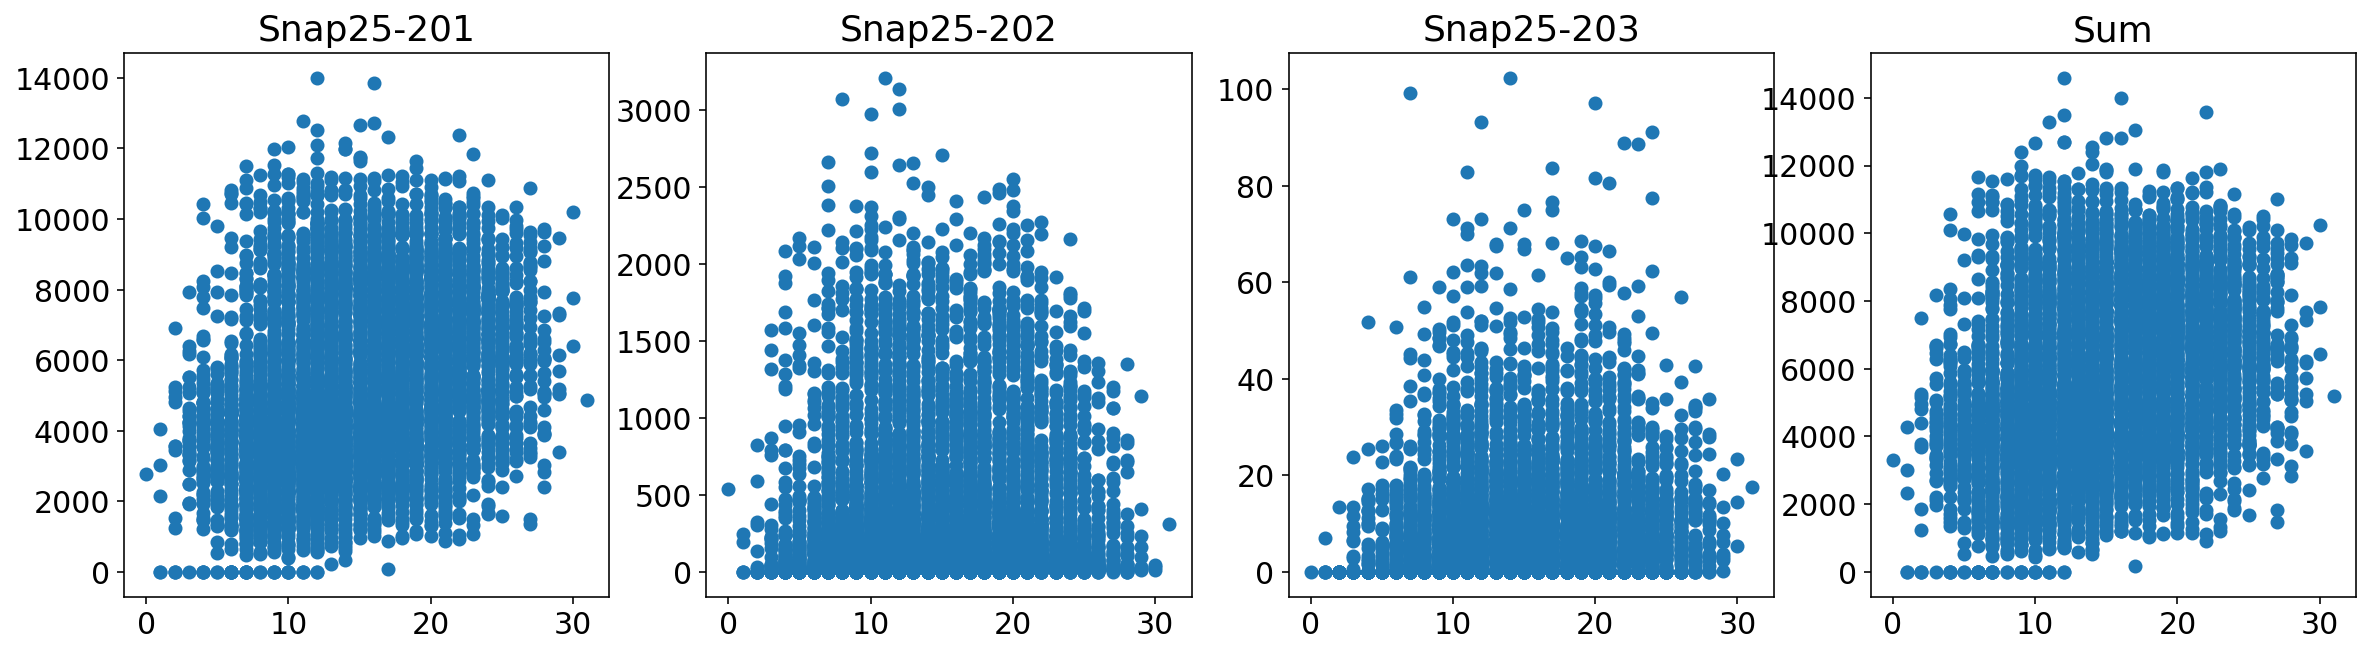

In [174]:
fig, axs = plt.subplots(ncols = 4, figsize=(20,5))

ax = axs[0]
ax.scatter(det, a)
ax.set(**{
    "title": "Snap25-201"
})

ax = axs[1]
ax.scatter(det, b)
ax.set(**{
    "title": "Snap25-202"
})

ax = axs[2]
ax.scatter(det, c)
ax.set(**{
    "title": "Snap25-203"
})

ax = axs[3]
ax.scatter(det, a+b+c)
ax.set(**{
    "title": "Sum"
})

fig.show()

In [112]:
m = np.logical_and(det>40, det<80)
f = det <= 40

In [117]:
mask = np.logical_and(a>0, f)
print(a[mask].mean())

mask = np.logical_and(a>0, m)
print(a[mask].mean())

mask = np.logical_and(b>0, f)
print(b[mask].mean())

mask = np.logical_and(b>0, m)
print(b[mask].mean())



14265.851
16172.744
573.24536
563.16583


In [118]:
10/500

0.02

In [119]:
2000/16000

0.125

16172.744

In [111]:
m

array([ True,  True,  True, ...,  True, False,  True])

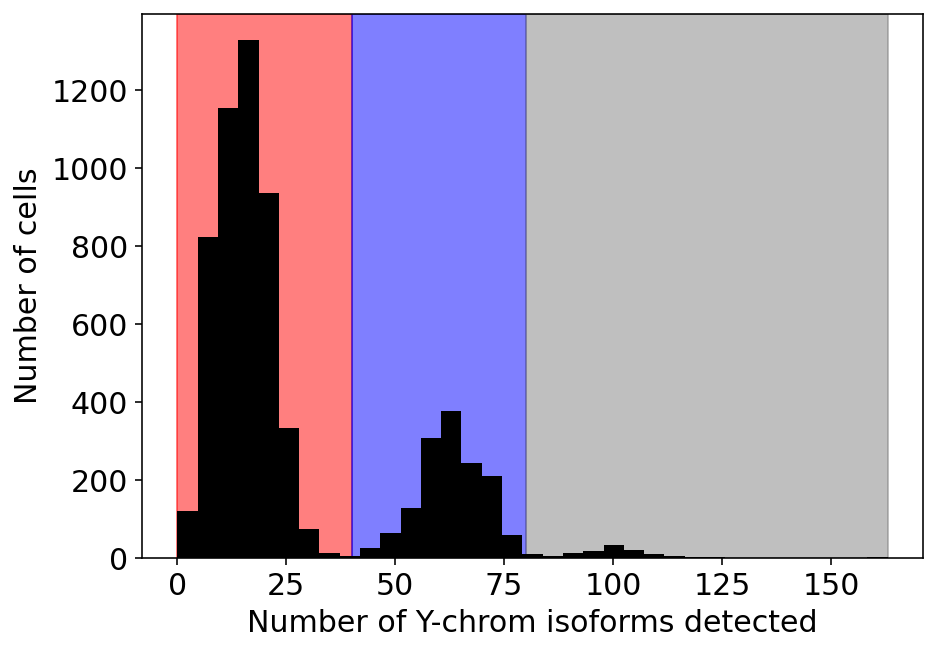

In [39]:
fig, ax = plt.subplots(figsize=(7,5))

ax.hist(det, bins=35, color="black", zorder=10)
ax.axvspan(0,40, alpha=0.5, color="red")
ax.axvspan(40,80, alpha=0.5, color="blue")
ax.axvspan(80,max(det), alpha=0.5, color="grey")

ax.set(**{
    "ylabel": "Number of cells",
    "xlabel": "Number of Y-chrom isoforms detected"
})

fig.show()

In [12]:
iso = anndata.read_h5ad("../../data/notebook/revision/isoform.h5ad")

In [13]:
iso

AnnData object with n_obs × n_vars = 6160 × 69172
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id', 'subclass_id', 'class_id', 'cell_counts', 'leiden', 'louvain'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length', 'gene_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'louvain', 'neighbors'
    obsm: 'X_nca', 'X_nca_tsne', 'X_pca', 'X_pca_tsne'
    layers: 'X', 'log1p', 'norm'
    obsp: 'connectivities', 'distances'

In [14]:
isoform.obs

,cluster_id,cluster_label,subclass_label,class_label,cluster_color,size,cell_id
0,10,Vip Chat_1,Vip,GABAergic,#FF00FF,33,LS-15395_S47_E1-50
1,38,L5 IT S100b_2,L5 IT,Glutamatergic,#2F8C4D,83,LS-15395_S48_E1-50
2,4,Lamp5 Slc35d3,Lamp5,GABAergic,#FFA388,194,LS-15395_S49_E1-50
3,38,L5 IT S100b_2,L5 IT,Glutamatergic,#2F8C4D,83,LS-15395_S50_E1-50
4,20,Sst Myh8_2,Sst,GABAergic,#D27A2A,55,LS-15395_S51_E1-50
...,...,...,...,...,...,...,...
6575,25,Pvalb Reln,Pvalb,GABAergic,#BC2D71,292,SM-GE935_S380_E1-50
6576,7,Sncg,Sncg,GABAergic,#9900B3,77,SM-GE935_S381_E1-50
6577,16,Vip Gpc3,Vip,GABAergic,#B94DA7,43,SM-GE935_S382_E1-50
6578,12,Vip Chat_3,Vip,GABAergic,#FF0CFF,87,SM-GE935_S383_E1-50


In [15]:
f = pd.Series(f, index = isoform.obs.cell_id)
m = pd.Series(m, index = isoform.obs.cell_id)
f = iso.obs.cell_id.map(f).values
m = iso.obs.cell_id.map(m).values

In [16]:
iso.obs["sex"] = "x"

iso.obs["sex"][f] = "f"
iso.obs["sex"][m] = "m"

/home/sina/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sina/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(iso.obs.groupby("subclass_label")["sex"].value_counts())

subclass_label  sex
Astro           f         9
Endo            f         7
L2/3 IT         f       311
                m       166
                x         5
L5 PT           m         7
                f         4
                x         1
L5 IT           f      1151
                m       381
                x        29
L5/6 NP         f       147
                m        59
                x         1
L6 CT           f       680
                m       207
                x        17
L6 IT           f       267
                m       120
                x         8
L6 IT Car3      m         3
                f         2
L6b             f       447
                m       111
                x        12
Lamp5           f       310
                m        46
                x         4
Low Quality     f        11
                m         1
Pvalb           f       404
                m       107
                x        10
SMC             f        19
Sncg            f        64


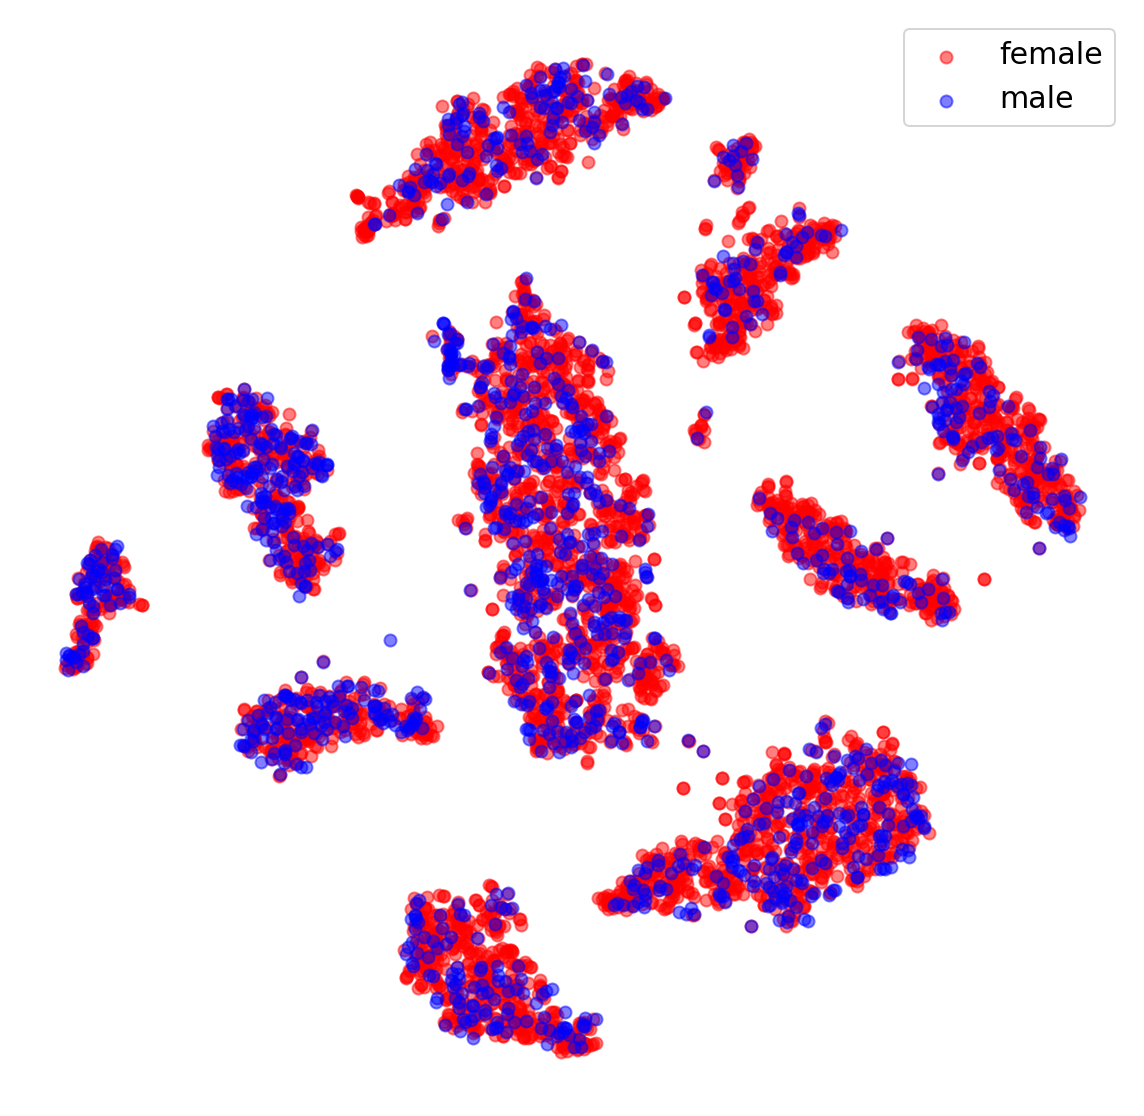

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

X = iso.obsm["X_nca_tsne"]

x = X[:,0][f]
y = X[:,1][f]
color = "red"

ax.scatter(x,y,color=color, label="female", alpha=0.5)

x = X[:,0][m]
y = X[:,1][m]
color = "blue"

ax.scatter(x,y,color=color, label="male", alpha=0.5)
ax.set_axis_off()
ax.legend()

plt.savefig(trackfig("../../figures/male_female_isoform_tsne_nca.png", TRACKFIG, NB), bbox_inches='tight', dpi=300)

fig.show()

In [19]:
df = (iso.obs.groupby("subclass_label")["sex"].value_counts()/iso.obs.groupby("subclass_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("f", ascending=False)

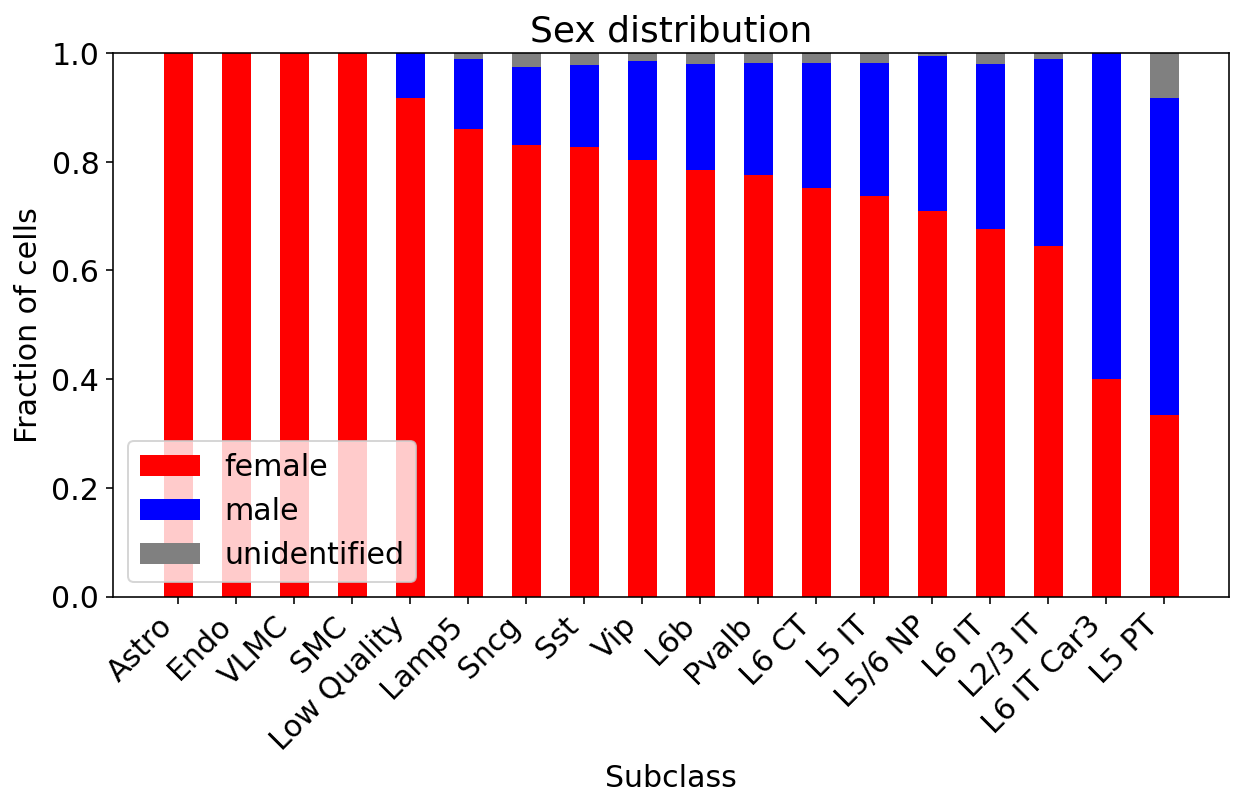

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["f"].values, width, color="red", label="female")
ax.bar(labels, df["m"].values, width, bottom=df["f"].values, color="blue", label="male")
ax.bar(labels, df["x"].values, width, bottom= df["f"].values + df["m"].values, color="grey", label="unidentified")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Subclass"
})

plt.savefig(trackfig("../../figures/subclass_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [26]:
df = (iso.obs.groupby("cluster_label")["sex"].value_counts()/iso.obs.groupby("cluster_label")["sex"].count()).unstack().fillna(0)

df = df.sort_values("f", ascending=False)

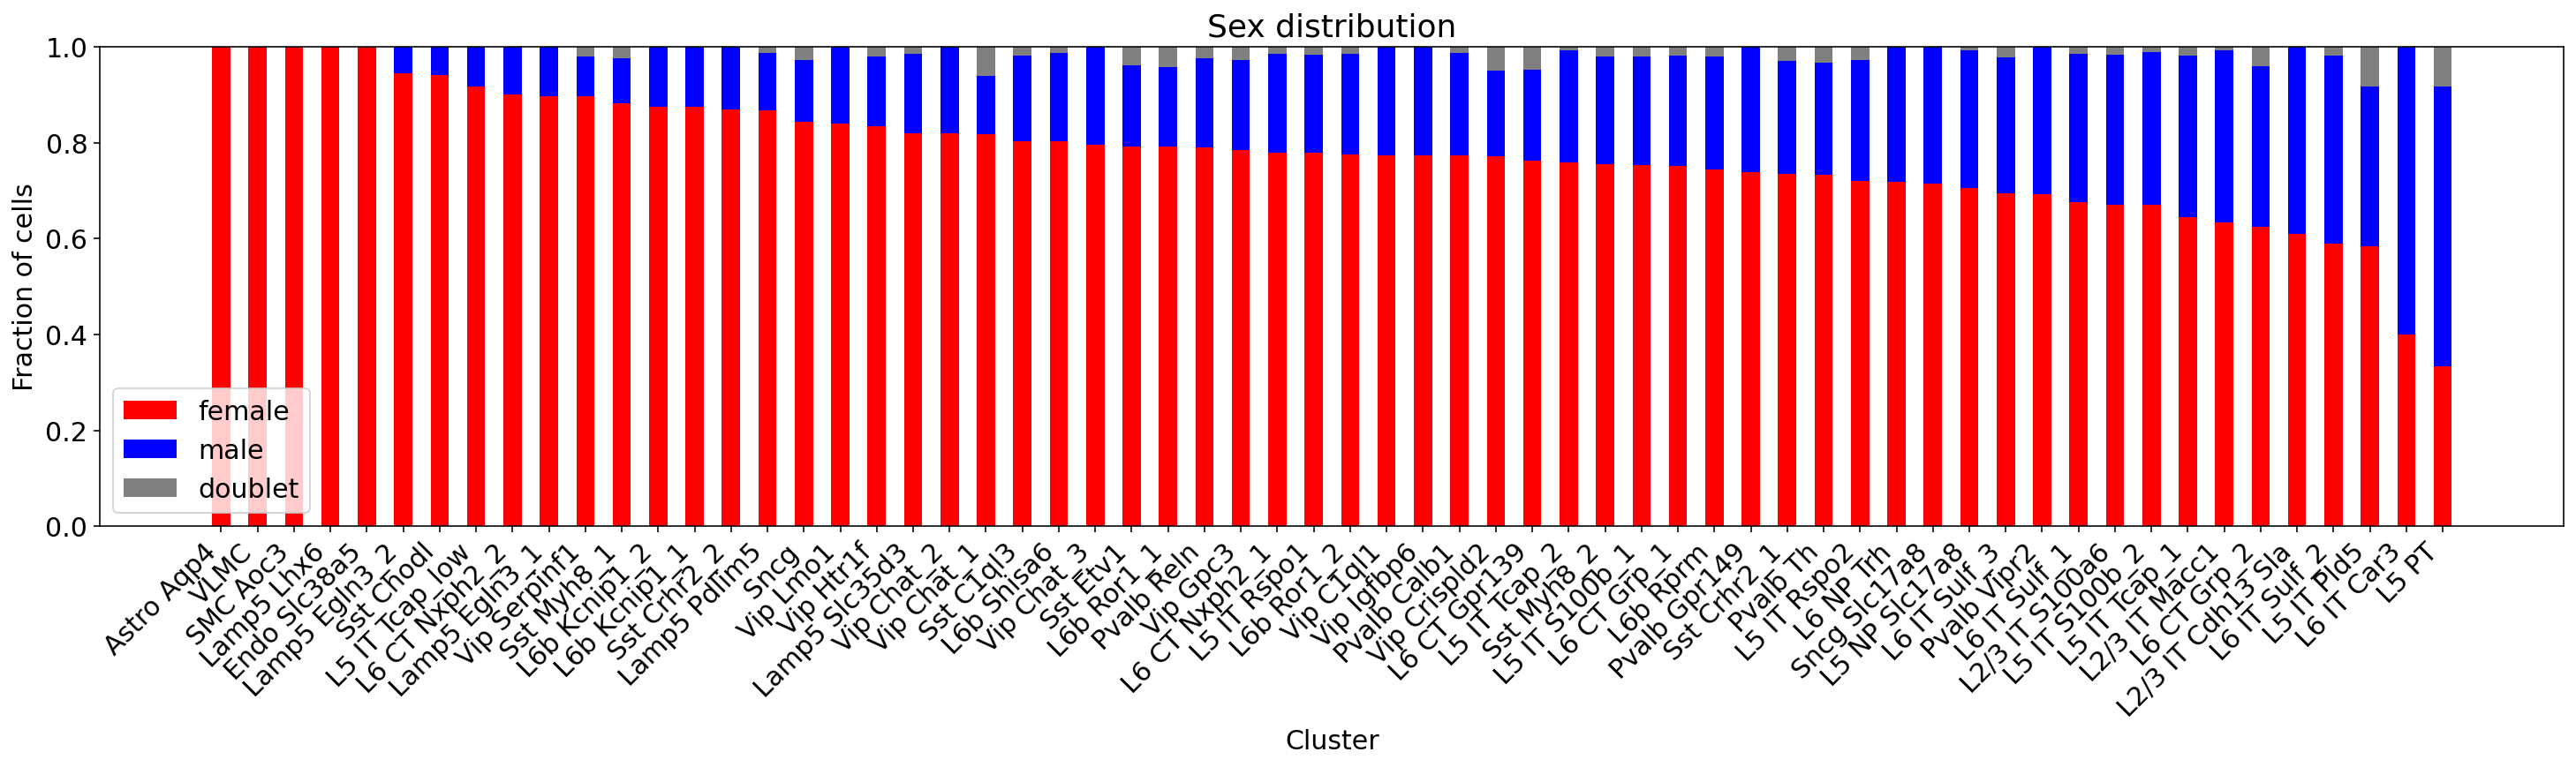

In [27]:
fig, ax = plt.subplots(figsize=(25,5))

labels = df.index.values
width = 0.5

ax.bar(labels, df["f"].values, width, color="red", label="female")
ax.bar(labels, df["m"].values, width, bottom=df["f"].values, color="blue", label="male")
ax.bar(labels, df["x"].values, width, bottom= df["f"].values + df["m"].values, color="grey", label="doublet")

ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend(loc="lower left")

ax.set(**{
    "title": "Sex distribution",
    "ylabel": "Fraction of cells",
    "xlabel": "Cluster"
})

plt.savefig(trackfig("../../figures/cluster_sex_distribution.png", TRACKFIG, NB), dpi=300, bbox_inches="tight")

fig.show()

In [234]:
iso.write_h5ad("../../data/notebook/revision/sex_isoform.h5ad")

... storing 'sex' as categorical


In [71]:
isoform

AnnData object with n_obs × n_vars = 6295 × 111079
    obs: 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'cluster_color', 'size', 'cell_id'
    var: 'transcript_id', 'gene_id', 'gene_name', 'transcript_name', 'length'
    layers: 'raw', 'scaled'

In [75]:
def violinplot(data, ax, **kwd): 
    xticklabels = kwd.get("xticklabels", [])
    xticks = kwd.get("xticks", [])
    selected = kwd.get("selected", None)
    color = kwd.get("color", "grey")
    
    if  len(xticks)==0: xticks = np.arange(len(data))+1;
    if  len(xticklabels)==0: xticklabels = np.arange(len(data))+1;
    assert(len(xticks) == len(xticklabels))
        
    violins = ax.violinplot(data, positions=xticks, showmeans=False, showmedians=False, showextrema=False)
    
    for vidx, v in enumerate(violins['bodies']):
        v.set_facecolor(color)
        v.set_edgecolor('black')
        v.set_alpha(1)
        if selected == vidx:
            v.set_facecolor("#D43F3A")

            
    
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.04, size=len(d))
        
        # actual points
        ax.scatter(xx, d, s = 5, color="white", edgecolor="black", linewidth=1)
        
        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))
        ax.scatter(x, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
        ax.vlines(x, mean - stdev, mean+stdev, color='lightgrey', linestyle='-', lw=2, zorder=9)
        
    ax.set(**{"xticks": xticks, "xticklabels":xticklabels})
    #ax.set_xticklabels(labels, rotation=45, ha="right")

    
    return ax


In [132]:
X = iso.layers["norm"][:,isoform.var.eval("gene_name =='Snap25_ENSMUSG00000027273'").values]

In [133]:
X

<6160x3 sparse matrix of type '<class 'numpy.float64'>'
	with 8883 stored elements in Compressed Sparse Row format>

In [130]:
txns = isoform.var[isoform.var.eval("gene_name =='Snap25_ENSMUSG00000027273'").values].transcript_name.values

Ttest_indResult(statistic=-6.202722784330219, pvalue=5.909335776895896e-10)
6.7418954917771545 7.643073525171163
Ttest_indResult(statistic=0.4315270452435245, pvalue=0.6661015009004985)
0.5653307942893276 0.5553903770202951
Ttest_indResult(statistic=-1.9809282686366156, pvalue=0.047665710939917234)
0.017157306665965745 0.018501750305985352
Ttest_indResult(statistic=-6.170457982368202, pvalue=7.240450943828929e-10)
7.247849168945544 8.177717350815874


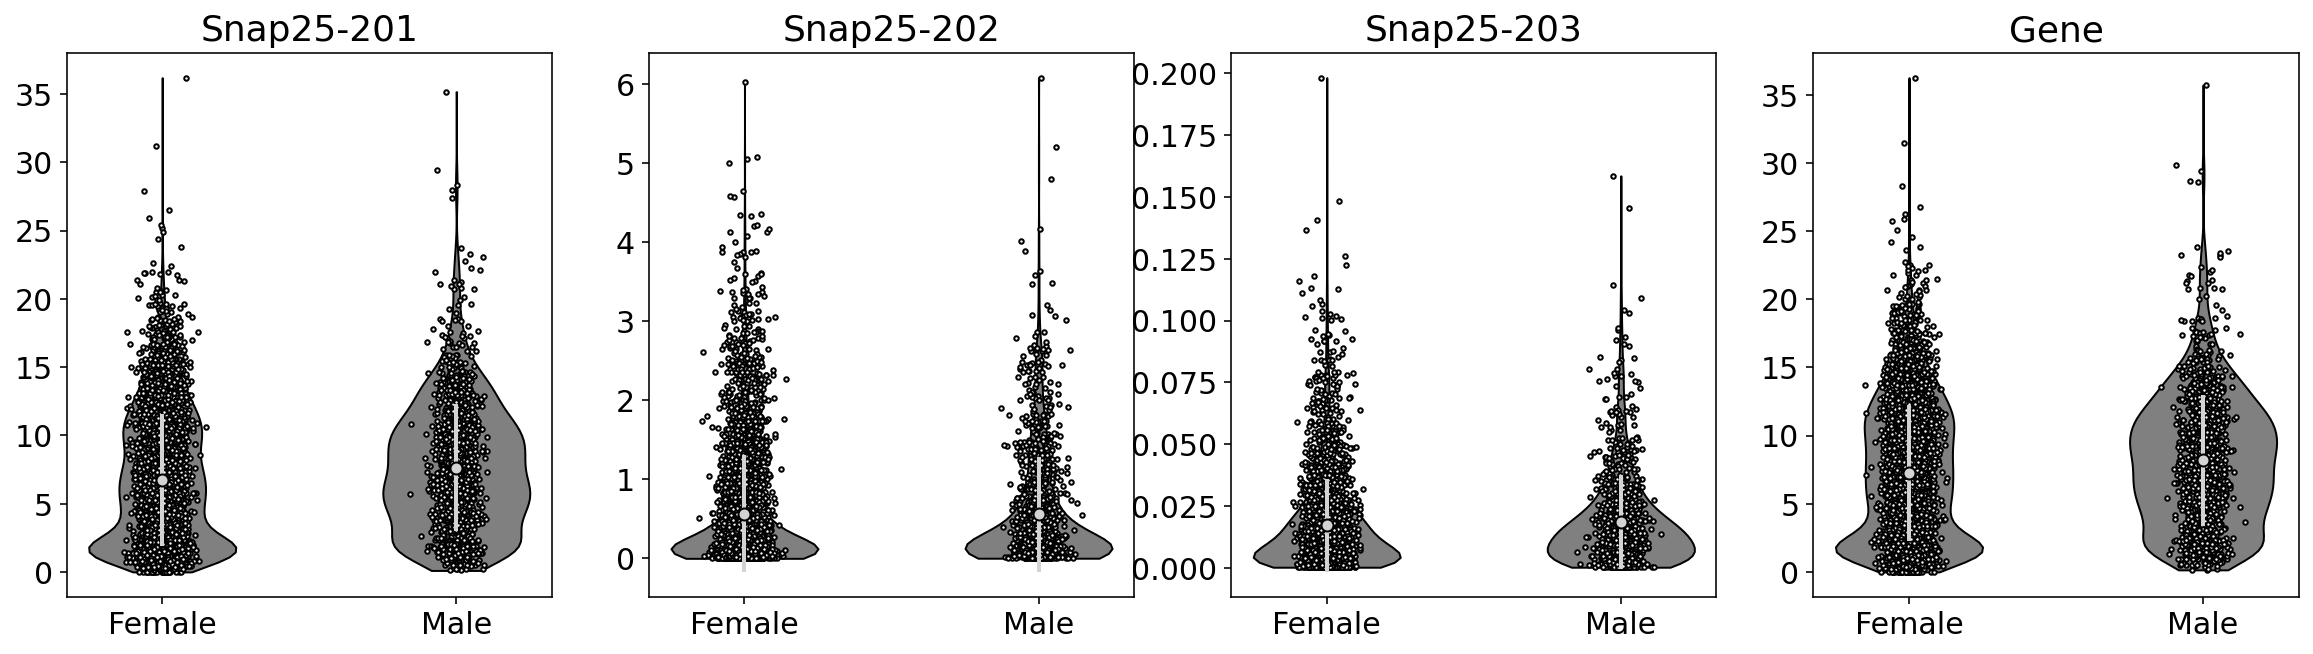

In [131]:
fig, axs = plt.subplots(figsize=(20,5), ncols=4)

mmask = np.logical_and(det>40, det<80)
fmask = det <= 40
themin = 100

ax = axs[0]
iso_num = 0

# female
x = nd(X[:,iso_num])
mask = np.logical_and(fmask, x>0)
x = x[mask]

#male
y = nd(X[:,iso_num])
mask = np.logical_and(mmask, y>0)
y = y[mask]

data = [x, y]
print(stats.ttest_ind(*data))
print(data[0].mean(), data[1].mean())
violinplot(data, ax, xticklabels=["Female", "Male"])
ax.set(**{
    "title": txns[iso_num].split("_")[0]
})

ax = axs[1]
iso_num = 2

# female
x = nd(X[:,iso_num])
mask = np.logical_and(fmask, x>0)
x = x[mask]

#male
y = nd(X[:,iso_num])
mask = np.logical_and(mmask, y>0)
y = y[mask]

data = [x, y]

print(stats.ttest_ind(*data))
print(data[0].mean(), data[1].mean())
violinplot(data, ax, xticklabels=["Female", "Male"])
ax.set(**{
    "title": txns[iso_num].split("_")[0]
})

ax = axs[2]

iso_num = 1

# female
x = nd(X[:,iso_num])
mask = np.logical_and(fmask, x>0)
x = x[mask]

#male
y = nd(X[:,iso_num])
mask = np.logical_and(mmask, y>0)
y = y[mask]

data = [x, y]

print(stats.ttest_ind(*data))
print(data[0].mean(), data[1].mean())
violinplot(data, ax, xticklabels=["Female", "Male"])
ax.set(**{
    "title": txns[iso_num].split("_")[0]
})


ax = axs[3]
data = [nd(X[fmask].sum(axis=1)), nd(X[mmask].sum(axis=1))]
print(stats.ttest_ind(*data))
print(data[0].mean(), data[1].mean())
violinplot(data, ax, xticklabels=["Female", "Male"])
ax.set(**{
    "title": "Gene" 
})

fig.show()

In [88]:
np.log1p(0.5)

0.4054651081081644

In [67]:
iso.obs.eval("sex=='f'")

0        True
1        True
2        True
3        True
4       False
        ...  
6575     True
6576     True
6577     True
6578    False
6579     True
Length: 6160, dtype: bool

In [89]:
isoform.layers

Layers with keys: raw, scaled

In [148]:
tmp = isoform.layers["raw"].sum(axis=1)

In [149]:
tmp

array([2231152.  , 2255495.8 , 2166458.  , ...,  482240.97,  442391.  ,
        578718.  ], dtype=float32)

In [150]:
x = np.sort(tmp)

In [151]:
import matplotlib as mpl

# Scaled by length of transcript

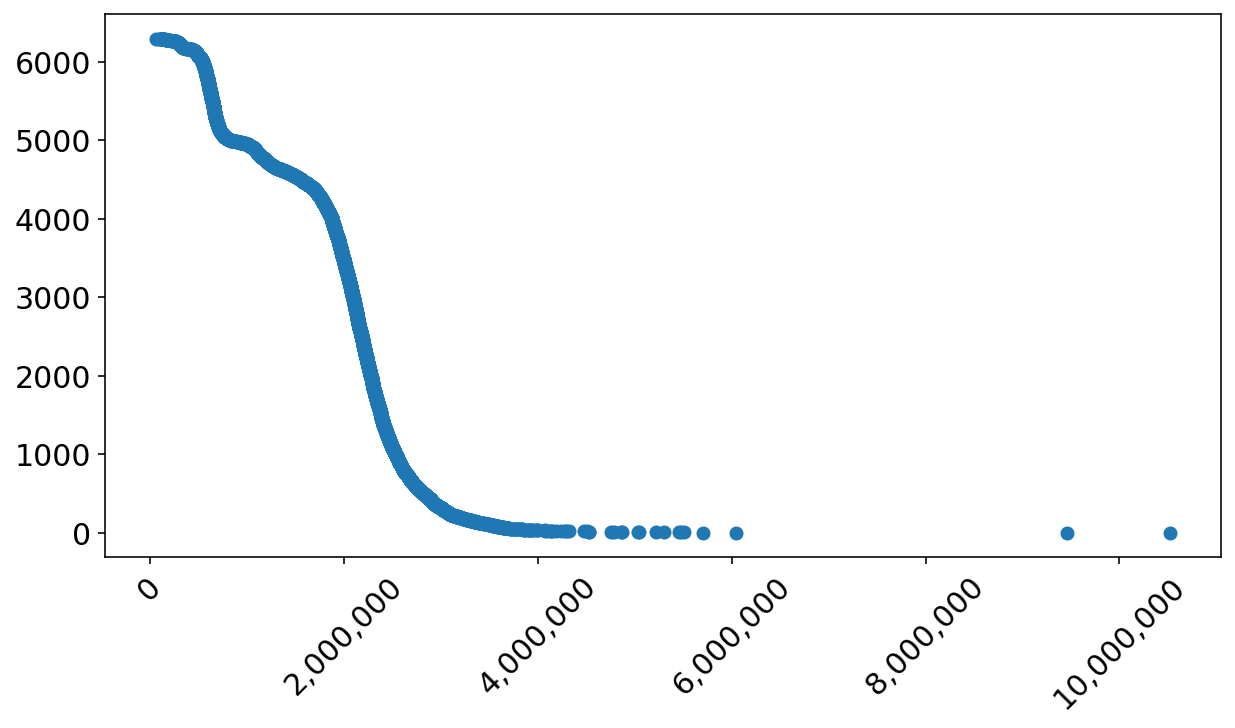

In [175]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(np.sort(x)[::-1], np.arange(x.shape[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.show()

In [176]:
iso.obs.sex.value_counts()

f    4663
m    1390
x     107
Name: sex, dtype: int64

In [180]:
tenx = anndata.read_h5ad("../../data/notebook/revision/10xv3_isoform_processed.h5ad")

In [181]:
tenx.var

,transcript_ids,ec_len,transcript_id,transcript_id_nov,transcript_name
0610005C13Rik-201_ENSMUST00000209416,['ENSMUST00000209416.1'],1,ENSMUST00000209416.1,ENSMUST00000209416,0610005C13Rik-201_ENSMUST00000209416
0610005C13Rik-202_ENSMUST00000209510,['ENSMUST00000209510.1'],1,ENSMUST00000209510.1,ENSMUST00000209510,0610005C13Rik-202_ENSMUST00000209510
0610005C13Rik-203_ENSMUST00000209910,['ENSMUST00000209910.1'],1,ENSMUST00000209910.1,ENSMUST00000209910,0610005C13Rik-203_ENSMUST00000209910
0610005C13Rik-204_ENSMUST00000210383,['ENSMUST00000210383.1'],1,ENSMUST00000210383.1,ENSMUST00000210383,0610005C13Rik-204_ENSMUST00000210383
0610005C13Rik-205_ENSMUST00000210569,['ENSMUST00000210569.1'],1,ENSMUST00000210569.1,ENSMUST00000210569,0610005C13Rik-205_ENSMUST00000210569
...,...,...,...,...,...
mt-Nd3-201_ENSMUST00000082411,['ENSMUST00000082411.1'],1,ENSMUST00000082411.1,ENSMUST00000082411,mt-Nd3-201_ENSMUST00000082411
mt-Nd4-201_ENSMUST00000082414,['ENSMUST00000082414.1'],1,ENSMUST00000082414.1,ENSMUST00000082414,mt-Nd4-201_ENSMUST00000082414
mt-Nd4l-201_ENSMUST00000084013,['ENSMUST00000084013.1'],1,ENSMUST00000084013.1,ENSMUST00000084013,mt-Nd4l-201_ENSMUST00000084013
mt-Nd5-201_ENSMUST00000082418,['ENSMUST00000082418.1'],1,ENSMUST00000082418.1,ENSMUST00000082418,mt-Nd5-201_ENSMUST00000082418


In [179]:
chry

,transcript_id,gene_id,gene_name,transcript_name,chromosome,start,stop,strand
Kdm5d-201_ENSMUST00000055032,ENSMUST00000055032.13,ENSMUSG00000056673.14,Kdm5d,Kdm5d-201,chr:Y,start:897790,end:946316,strand:+
Zfy1-201_ENSMUST00000065545,ENSMUST00000065545.5,ENSMUSG00000053211.10,Zfy1,Zfy1-201,chr:Y,start:725209,end:797409,strand:-
Uty-201_ENSMUST00000069309,ENSMUST00000069309.13,ENSMUSG00000068457.14,Uty,Uty-201,chr:Y,start:1097144,end:1245718,strand:-
Sry-201_ENSMUST00000091178,ENSMUST00000091178.1,ENSMUSG00000069036.3,Sry,Sry-201,chr:Y,start:2662471,end:2663658,strand:-
Usp9y-201_ENSMUST00000091188,ENSMUST00000091188.6,ENSMUSG00000069044.6,Usp9y,Usp9y-201,chr:Y,start:1298961,end:1459782,strand:-
...,...,...,...,...,...,...,...,...
Gm37071-203_ENSMUST00000195814,ENSMUST00000195814.5,ENSMUSG00000103977.5,Gm37071,Gm37071-203,chr:Y,start:25077341,end:25080578,strand:-
Gm37263-201_ENSMUST00000195837,ENSMUST00000195837.1,ENSMUSG00000103524.1,Gm37263,Gm37263-201,chr:Y,start:13917048,end:13920389,strand:-
Gm32181-203_ENSMUST00000195871,ENSMUST00000195871.1,ENSMUSG00000103462.5,Gm32181,Gm32181-203,chr:Y,start:26326349,end:26328708,strand:-
Gm37130-202_ENSMUST00000195874,ENSMUST00000195874.5,ENSMUSG00000103681.5,Gm37130,Gm37130-202,chr:Y,start:13952701,end:13955065,strand:+


In [182]:
tmp = tenx[:, tenx.var.transcript_name.isin(chry.index.values)]

In [184]:
tmp

View of AnnData object with n_obs × n_vars = 94162 × 1259
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id'
    var: 'transcript_ids', 'ec_len', 'transcript_id', 'transcript_id_nov', 'transcript_name'
    layers: 'X', 'log1p', 'norm'

In [187]:
tmp[:,tmp.var.transcript_name.str.contains("Snap25")]

View of AnnData object with n_obs × n_vars = 94162 × 0
    obs: 'batch', 'cluster_id', 'cluster_label', 'subclass_label', 'class_label', 'subclass_id', 'class_id'
    var: 'transcript_ids', 'ec_len', 'transcript_id', 'transcript_id_nov', 'transcript_name'
    layers: 'X', 'log1p', 'norm'

In [192]:
det = nd((tmp.layers["norm"]>0).sum(axis=1))

(array([2.2327e+04, 1.9413e+04, 3.1091e+04, 9.3720e+03, 9.1610e+03,
        1.7160e+03, 9.4300e+02, 1.0100e+02, 3.5000e+01, 3.0000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

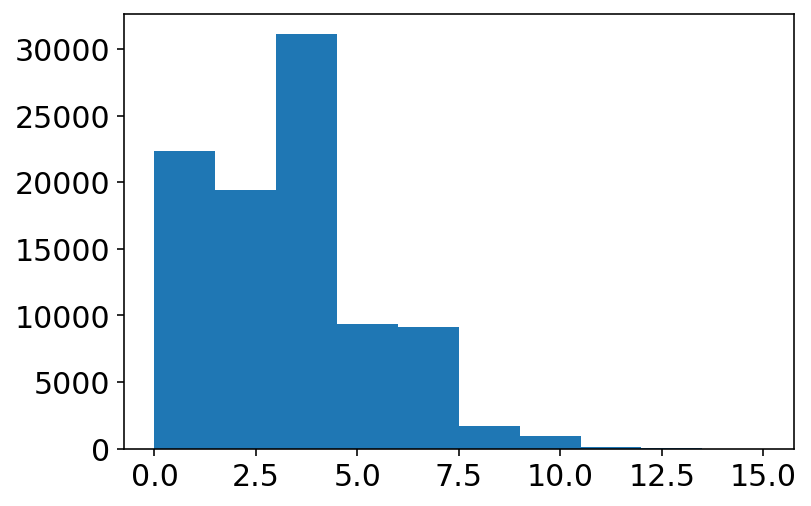

In [194]:
plt.hist(det)